In [288]:
import pandas as pd
import numpy as np
import multiprocessing

multiprocessing.cpu_count()
import torch
import os
import pandas as pd
from torchvision.io import read_image
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from torch import nn, optim
import torch.nn.functional as F
import torch.utils.data as data
import torch
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from collections import Counter
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from ray import tune
from ray.air import Checkpoint, session
from ray.tune.schedulers import ASHAScheduler
from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pyreadr
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

#sklearn.metrics.SCORERS.keys()
np.random.seed(42)




In [11]:
x_train = pd.read_pickle("TRAIN_FINAL_VARIANTS_OLINK")
x_test = pd.read_pickle("TEST_FINAL_VARIANTS_OLINK")
y_train = pd.read_pickle("TRAIN_Y_FINAL_VARIANTS_OLINK")
y_test = pd.read_pickle("TEST_Y_FINAL_VARIANTS_OLINK")

In [368]:
y_train

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
26068    0.0
26069    0.0
26070    0.0
26071    0.0
26072    0.0
Name: Y, Length: 26073, dtype: float64

In [6]:
test.shape

(17335, 2100)

In [120]:
#Hyperparameter tuning
logistic_search = LogisticRegression(class_weight="balanced")
solvers = ['lbfgs']
c_values = [100, 10, 1.0, 0.1, 0.01]
iter = [400, 500, 600, 700, 1000, 1200,3000,5000]
grid = dict(solver=solvers,C=c_values, max_iter=iter)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logistic_search, param_grid=grid, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/home/ffc4001/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ffc4001/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/home/ffc4001/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ffc4001/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Best: 0.962924 using {'C': 100, 'max_iter': 500, 'solver': 'lbfgs'}
0.962924 (0.000778) with: {'C': 100, 'max_iter': 500, 'solver': 'lbfgs'}
0.962018 (0.000759) with: {'C': 10, 'max_iter': 500, 'solver': 'lbfgs'}
0.960730 (0.000901) with: {'C': 1.0, 'max_iter': 500, 'solver': 'lbfgs'}
0.958235 (0.000711) with: {'C': 0.1, 'max_iter': 500, 'solver': 'lbfgs'}
0.947759 (0.001426) with: {'C': 0.01, 'max_iter': 500, 'solver': 'lbfgs'}


/home/ffc4001/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [231]:
classifier = LogisticRegression(class_weight="balanced",C=0.01, max_iter=700, solver='lbfgs')
classifier.fit(x_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=700)

In [275]:
y_pred = classifier.predict(x_test)
test_acc = sklearn.metrics.roc_auc_score(y_test, y_pred3)
print("The AUC ROC for Test Set is {}".format(test_acc*100))

The AUC ROC for Test Set is 70.48936996250924


In [ ]:
#Tune for accuracy

In [233]:
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [234]:
y_pred1 = classifier.predict_proba(x_test)[:,1]
y_pred3 = np.where(y_pred1 > 0.07, 1, 0)

In [235]:
y_pred1

array([0.89893757, 0.18973799, 0.16292594, ..., 0.00270398, 0.35551157,
       0.03024605])

TypeError: 'numpy.dtype[float64]' object is not callable

In [270]:
y_pred3 = np.where(y_pred1 > 0.07, 1, 0)

In [271]:
y_pred3

array([1, 1, 1, ..., 0, 1, 0])

Text(0.5, 36.72222222222221, 'Predicted Values')

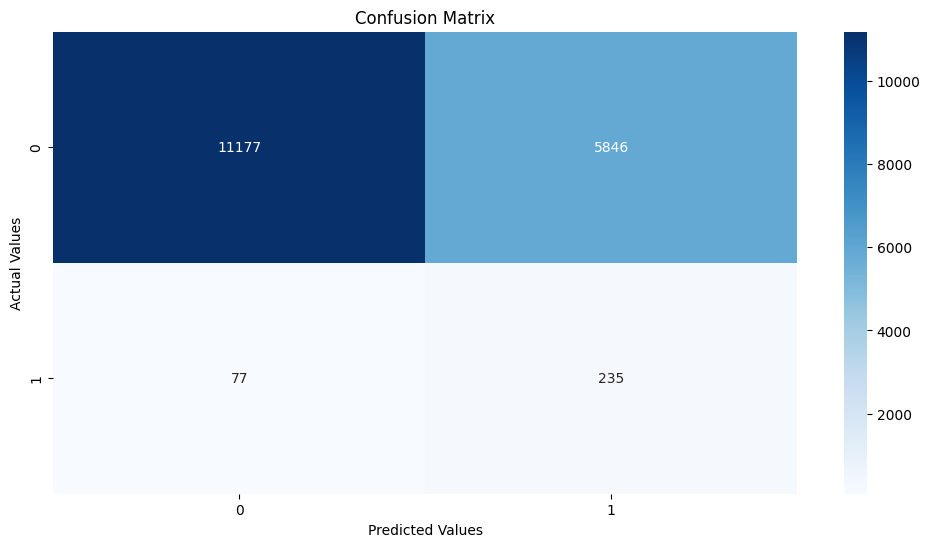

In [272]:
cm=confusion_matrix(y_test,y_pred3)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [273]:

specificity = tn / (tn+fp)
sens = tp / (tp+fn)
specificity

0.6565822710450567

In [274]:
sens

0.7532051282051282

<AxesSubplot: ylabel='Feature'>

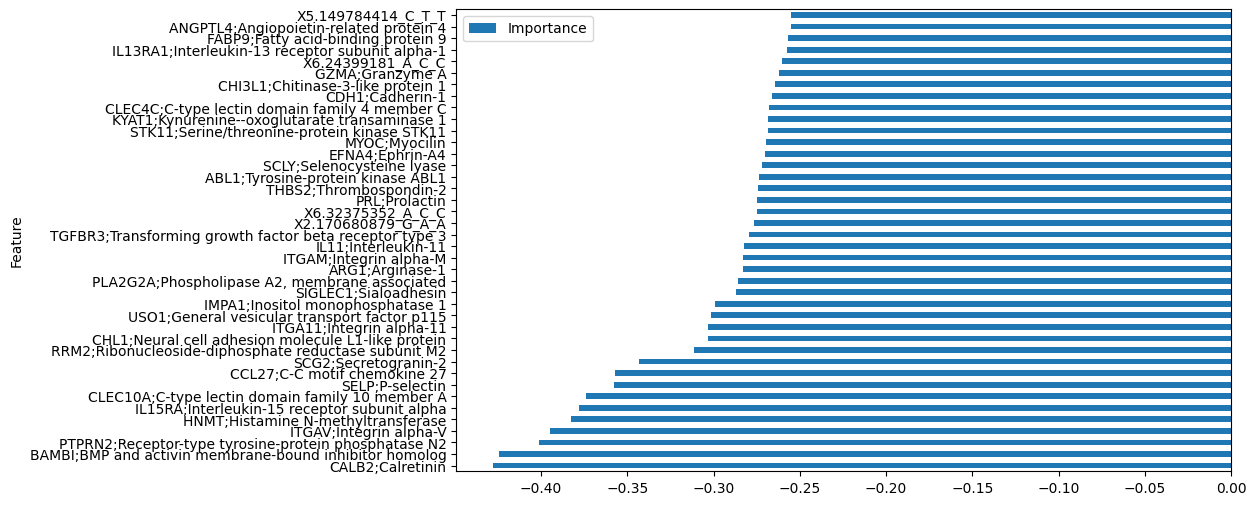

In [374]:
coefficients = classifier.coef_[0]

feature_importance_log = pd.DataFrame({'Feature': x_train.columns, 'Importance': (coefficients)})
feature_importance3 = feature_importance_log.sort_values('Importance', ascending=True)[0:40]
feature_importance3.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

<AxesSubplot: ylabel='Feature'>

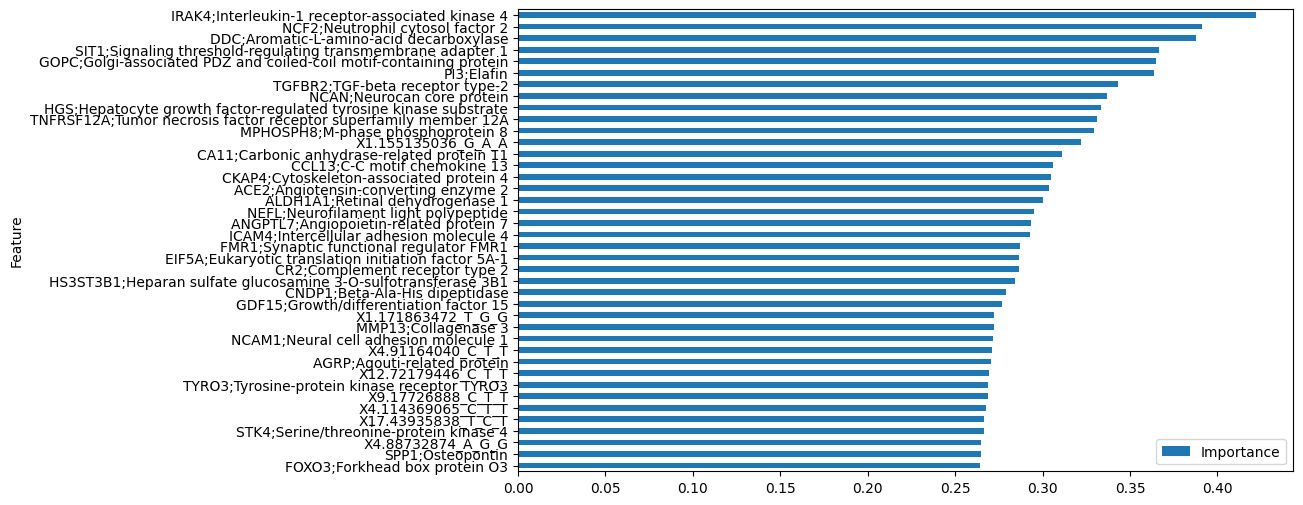

In [71]:
feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': (coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)[2060:2100]
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [89]:
feature_importance[2050:2100]

,Feature,Importance


In [61]:
feature_importance[0:50]

,Feature,Importance
792,CALB2;Calretinin,-0.427770
750,BAMBI;BMP and activin membrane-bound inhibitor...,-0.424596
1766,PTPRN2;Receptor-type tyrosine-protein phosphat...,-0.400865
1400,ITGAV;Integrin alpha-V,-0.394691
1289,HNMT;Histamine N-methyltransferase,-0.382599
1342,IL15RA;Interleukin-15 receptor subunit alpha,-0.377835
935,CLEC10A;C-type lectin domain family 10 member A,-0.373985
1841,SELP;P-selectin,-0.357573
824,CCL27;C-C motif chemokine 27,-0.357205
1830,SCG2;Secretogranin-2,-0.343282


In [41]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import statsmodels.api as sm



/home/ffc4001/.local/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/ffc4001/.local/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


LinAlgError: Singular matrix

In [44]:
threshold = 0.2

x_train1 = x_train.drop(x_train.std()[x_train.std() < threshold].index.values, axis=1)

In [45]:
x_train1

,Inferred_Gender,Age,X1.8495945_T_C_C,X1.20149058_A_G_G,X1.20149560_G_A_A,X1.20150839_A_G_G,X1.20150984_C_G_G,X1.20150998_A_G_G,X1.20151290_C_A_A,X1.20151431_A_G_G,...,WNT9A;Protein Wnt-9a,WWP2;NEDD4-like E3 ubiquitin-protein ligase WWP2,XCL1;Lymphotactin,XG;Glycoprotein Xg,XPNPEP2;Xaa-Pro aminopeptidase 2,XRCC4;DNA repair protein XRCC4,YES1;Tyrosine-protein kinase Yes,YTHDF3;YTH domain-containing family protein 3,ZBTB16;Zinc finger and BTB domain-containing protein 16,ZBTB17;Zinc finger and BTB domain-containing protein 17
0,0,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.3976,-0.1779,0.0035,-0.00010,1.53040,0.14805,0.1138,0.00205,-0.15445,-0.23840
1,0,63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.5776,1.4763,1.6084,2.50490,0.20960,0.95065,1.7539,1.60820,2.95895,2.38200
2,0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.1263,0.4304,-0.5720,-0.11230,-0.79590,0.14650,0.0000,-1.20050,1.00125,0.40830
3,1,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0088,0.0434,-0.4618,-0.16240,0.57460,0.15085,-0.2558,-0.20285,-0.18495,-0.15640
4,1,41,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,-0.4184,-0.7404,-0.4804,-0.39375,1.16155,0.29955,-2.4493,-1.99725,-0.15660,0.01445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26068,0,42,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.6161,1.4456,-0.8182,0.16810,-0.06440,0.57295,1.7542,0.23905,0.67695,0.45420
26069,0,53,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.3589,0.3378,-0.1453,0.22240,1.03260,0.07465,0.8922,0.16935,0.42315,0.18060
26070,1,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2424,0.5050,-0.2181,0.01400,-1.21590,0.06865,1.2475,0.77360,0.56455,-0.40670
26071,1,54,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0208,0.4288,-0.0295,-0.56130,-2.15160,0.17025,0.7288,0.44765,0.04625,-0.12660


In [51]:
sm_model = sm.GLM(y_train, x_train1, family=sm.families.Binomial())
gamma_results = sm_model.fit()

/home/ffc4001/.local/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/ffc4001/.local/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/ffc4001/.local/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/ffc4001/.local/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/ffc4001/.local/lib/python3.9/site-packages/statsmodels/genmod/gen

In [52]:
print(gamma_results.pvalues)
gamma_results.summary()

Inferred_Gender                                            0.999998
Age                                                        0.999995
X1.8495945_T_C_C                                           0.999981
X1.20149058_A_G_G                                          0.999950
X1.20149560_G_A_A                                          0.999950
                                                             ...   
XRCC4;DNA repair protein XRCC4                             0.999989
YES1;Tyrosine-protein kinase Yes                           0.999979
YTHDF3;YTH domain-containing family protein 3              0.999983
ZBTB16;Zinc finger and BTB domain-containing protein 16    0.999927
ZBTB17;Zinc finger and BTB domain-containing protein 17    0.999981
Length: 1986, dtype: float64


/home/ffc4001/.local/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/ffc4001/.local/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/home/ffc4001/.local/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                26073
Model:                            GLM   Df Residuals:                    24098
Model Family:                Binomial   Df Model:                         1974
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 04 Dec 2023   Deviance:                   4.7021e-09
Time:                        15:16:59   Pearson chi2:                 2.35e-09
No. Iterations:                    33   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================================================================================================================================================
                                                                                                                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Inferred_Gender                                                                                                                                         2.1638   8.24e+05   2.63e-06      1.000   -1.61e+06    1.61e+06
Age                                                                                                                                                    -0.1654   2.59e+04  -6.38e-06      1.000   -5.08e+04    5.08e+04
X1.8495945_T_C_C                                                                                                                                       -3.4628   1.49e+05  -2.32e-05      1.000   -2.92e+05    2.92e+05
X1.20149058_A_G_G                                                                                                                                     -79.3504   1.27e+06  -6.23e-05      1.000   -2.49e+06    2.49e+06
X1.20149560_G_A_A                                                                                                                                      97.0969   1.55e+06   6.27e-05      1.000   -3.04e+06    3.04e+06
X1.20150839_A_G_G                                                                                                                                     -73.7268   5.96e+06  -1.24e-05      1.000   -1.17e+07    1.17e+07
X1.20150984_C_G_G                                                                                                                                      57.7027   3.18e+06   1.81e-05      1.000   -6.23e+06    6.23e+06
X1.20150998_A_G_G                                                                                                                                      57.7027   3.18e+06   1.81e-05      1.000   -6.23e+06    6.23e+06
X1.20151290_C_A_A                                                                                                                                    -322.8611   2.76e+06     -0.000      1.000   -5.41e+06    5.41e+06
X1.20151431_A_G_G                                                                                                                                     459.4543   3.55e+06      0.000      1.000   -6.95e+06    6.95e+06
X1.20151939_G_C_C                                                                                                                                    -147.9750    1.9e+06  -7.78e-05      1.000   -3.73e+06    3.73e+06
X1.20155678_C_T_T                                          

In [38]:
X_new.shape

(26073, 10)

In [39]:
x_train.shape

(26073, 2100)

In [86]:
y_train.sum()

466.0

In [87]:
466/26000

0.017923076923076924

In [ ]:
#Support vector
classifier = LogisticRegression(class_weight="balanced",C=0.01, max_iter=700, solver='lbfgs')
classifier.fit(x_train, y_train)

In [ ]:
y_pred = classifier.predict(x_test)
test_acc = sklearn.metrics.roc_auc_score(y_test, y_pred)
print("The AUC ROC for Test Set is {}".format(test_acc*100))

In [72]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV  

In [360]:
svm = sklearn.svm.SVC(kernel='rbf', probability=True, C=1, gamma="scale")
svm1 = model.fit(x_train, y_train)


In [356]:
model1 = SGDClassifier(loss='hinge',class_weight='balanced')
clf = CalibratedClassifierCV(model)
model.fit(x_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class, not the predicted outputs.



NotFittedError: This SGDClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [361]:
y_pred4 = svm1.predict_proba(x_test)[:,1]

AttributeError: probability estimates are not available for loss='hinge'

In [305]:
y_pred4

array([0.41469729, 0.00725556, 0.0051986 , ..., 0.0020482 , 0.01106699,
       0.00325101])

In [323]:
y_train_pred1 = model.predict(x_train)

In [327]:
y_train_pred.sum()

170.0

In [324]:
    
#y_test_pred = model.predict(x_test) 
y_pred4 = model.predict_proba(x_test)[:,1]
y_pred5 = np.where(y_pred4 > 0.005, 1, 0)

In [313]:
y_test_pred

array([1., 0., 0., ..., 0., 0., 0.])

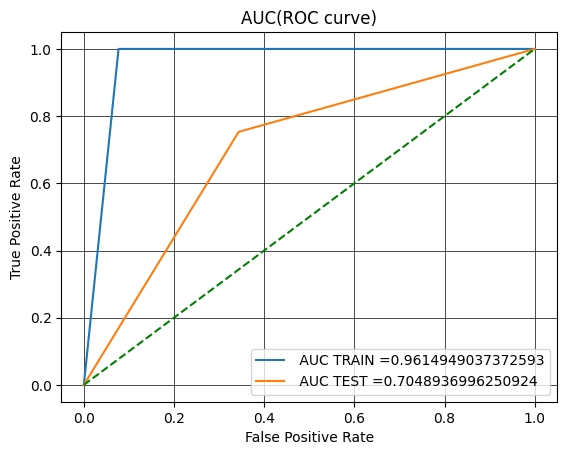

In [276]:
#logistic regression aucroc
y_train_pred = classifier.predict(x_train)    
#y_test_pred = classifier.predict(x_test) 
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred3)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

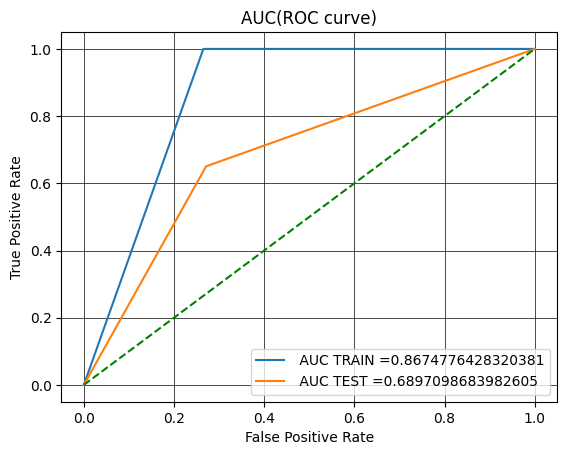

In [362]:
#SGD
y_train_pred1 = svm1.predict(x_train)
y_test_pred = svm1.predict(x_test)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

Text(0.5, 36.72222222222221, 'Predicted Values')

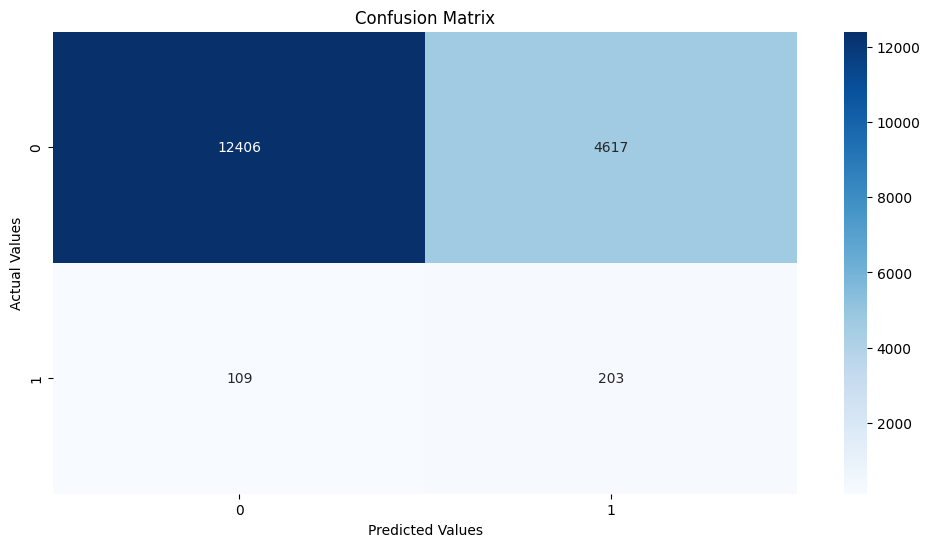

In [363]:
cm=confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [364]:
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)
sens = tp / (tp+fn)
specificity

0.7287787111554955

In [365]:
sens

0.6506410256410257

In [91]:
1+1

2

<AxesSubplot: ylabel='Feature'>

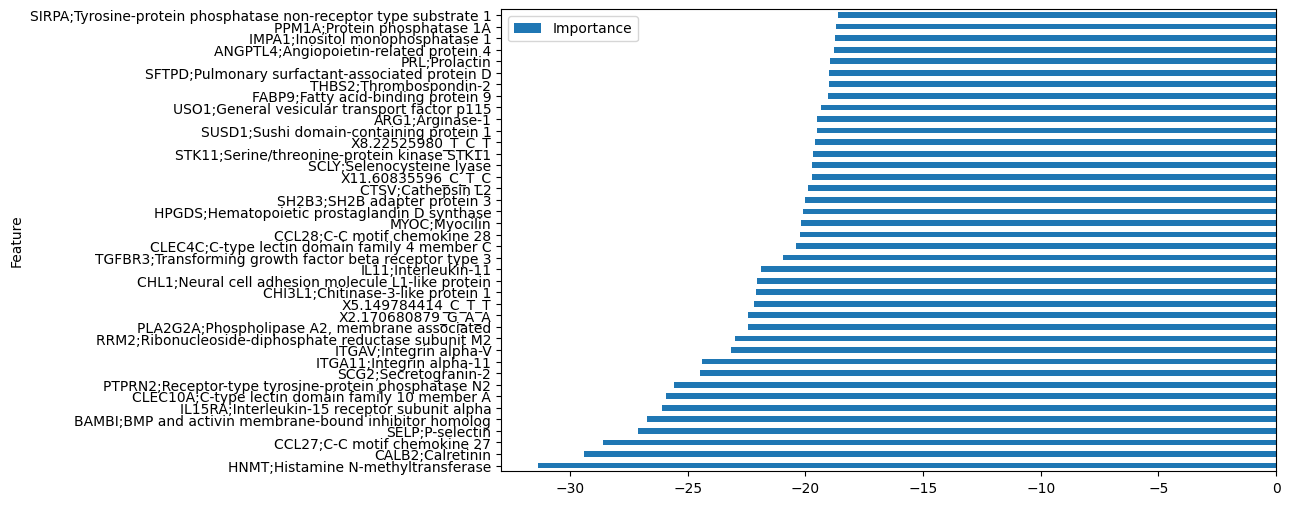

In [370]:
coefficients1 = svm1.coef_[0]

feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': (coefficients1)})
feature_importance1 = feature_importance.sort_values('Importance', ascending=True)[0:40]
feature_importance1.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

<AxesSubplot: ylabel='Feature'>

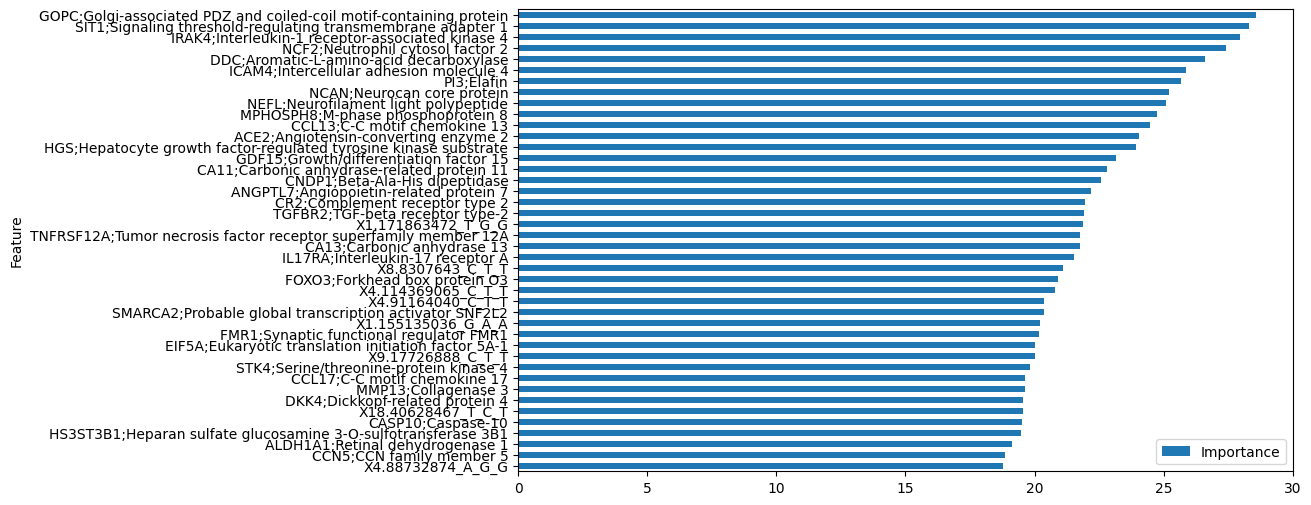

In [367]:
feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': (coefficients1)})
feature_importance2 = feature_importance.sort_values('Importance', ascending=True)[2058:2100]
feature_importance2.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [379]:
svm_neg = feature_importance.sort_values('Importance', ascending=True)[0:100]

In [380]:
svm_pos = feature_importance.sort_values('Importance', ascending=True)[2000:2100]

In [381]:
svm_pos

,Feature,Importance
1135,ESM1;Endothelial cell-specific molecule 1,15.317742
635,X22.39758541_A_G_A,15.501832
659,ADAMTS8;A disintegrin and metalloproteinase wi...,15.556566
1432,KLK6;Kallikrein-6,15.567569
1869,SIAE;Sialate O-acetylesterase,15.605105
...,...,...
1052,DDC;Aromatic-L-amino-acid decarboxylase,26.595370
1585,NCF2;Neutrophil cytosol factor 2,27.398360
1393,IRAK4;Interleukin-1 receptor-associated kinase 4,27.947399
1881,SIT1;Signaling threshold-regulating transmembr...,28.310746


In [382]:
log_neg = feature_importance_log.sort_values('Importance', ascending=True)[0:100]

In [383]:
log_pos = feature_importance_log.sort_values('Importance', ascending=True)[2000:2100]

In [384]:
log_neg

,Feature,Importance
792,CALB2;Calretinin,-0.427770
750,BAMBI;BMP and activin membrane-bound inhibitor...,-0.424596
1766,PTPRN2;Receptor-type tyrosine-protein phosphat...,-0.400865
1400,ITGAV;Integrin alpha-V,-0.394691
1289,HNMT;Histamine N-methyltransferase,-0.382599
...,...,...
1865,SFTPD;Pulmonary surfactant-associated protein D,-0.203918
808,CCL11;Eotaxin,-0.203682
1162,FCRL2;Fc receptor-like protein 2,-0.203460
1042,DBI;Acyl-CoA-binding protein,-0.202076


In [388]:
neg = list(set(svm_neg.Feature) & set(log_neg.Feature))

In [389]:
neg

['PTPRN2;Receptor-type tyrosine-protein phosphatase N2',
 'EFNA4;Ephrin-A4',
 'CALB2;Calretinin',
 'FABP9;Fatty acid-binding protein 9',
 'STK11;Serine/threonine-protein kinase STK11',
 'KYAT1;Kynurenine--oxoglutarate transaminase 1',
 'THBS2;Thrombospondin-2',
 'AGRN;Agrin',
 'X5.149784414_C_T_T',
 'X17.40741013_T_C_C',
 'BOC;Brother of CDO',
 'RET;Proto-oncogene tyrosine-protein kinase receptor Ret',
 'PLA2G2A;Phospholipase A2, membrane associated',
 'MYOC;Myocilin',
 'X11.60835596_C_T_C',
 'LEFTY2;Left-right determination factor 2',
 'PRSS27;Serine protease 27',
 'SELP;P-selectin',
 'IL11;Interleukin-11',
 'HNMT;Histamine N-methyltransferase',
 'SH2B3;SH2B adapter protein 3',
 'CXCL8;Interleukin-8',
 'CHI3L1;Chitinase-3-like protein 1',
 'RWDD1;RWD domain-containing protein 1',
 'CXCL13;C-X-C motif chemokine 13',
 'SCG3;Secretogranin-3',
 'X4.103188709_C_T_T',
 'IL13RA1;Interleukin-13 receptor subunit alpha-1',
 'NBN;Nibrin',
 'SIGLEC1;Sialoadhesin',
 'KRT14;Keratin, type I cytoskel

In [390]:
pos = list(set(svm_pos.Feature) & set(log_pos.Feature))

In [391]:
pos

['X8.10999583_C_T_T',
 'ACE2;Angiotensin-converting enzyme 2',
 'APOH;Beta-2-glycoprotein 1',
 'COPE;Coatomer subunit epsilon',
 'NCAN;Neurocan core protein',
 'IL18;Interleukin-18',
 'FMR1;Synaptic functional regulator FMR1',
 'NUDC;Nuclear migration protein nudC',
 'HGS;Hepatocyte growth factor-regulated tyrosine kinase substrate',
 'BTN3A2;Butyrophilin subfamily 3 member A2',
 'PGF;Placenta growth factor',
 'ANGPTL7;Angiopoietin-related protein 7',
 'SMARCA2;Probable global transcription activator SNF2L2',
 'X16.89986117_C_T_T',
 'TBCB;Tubulin-folding cofactor B',
 'GOPC;Golgi-associated PDZ and coiled-coil motif-containing protein',
 'SIT1;Signaling threshold-regulating transmembrane adapter 1',
 'THBS4;Thrombospondin-4',
 'IGFBP3;Insulin-like growth factor-binding protein 3',
 'DPEP1;Dipeptidase 1',
 'CR2;Complement receptor type 2',
 'PI3;Elafin',
 'ICAM4;Intercellular adhesion molecule 4',
 'CASP10;Caspase-10',
 'MPHOSPH8;M-phase phosphoprotein 8',
 'CCL13;C-C motif chemokine 13

In [398]:
shap_top = pd.read_csv("shap_top.csv")

In [399]:
shap_top

,Unnamed: 0,col_name,feature_importance_vals
0,1,Age,0.241191
1,1653,PAEP;Glycodelin,0.219273
2,1571,MUC16;Mucin-16,0.175250
3,920,CGA;Glycoprotein hormones alpha chain,0.117785
4,1711,PNLIPRP2;Pancreatic lipase-related protein 2,0.117160
...,...,...,...
195,800,CASP10;Caspase-10,0.047450
196,1628,NTF4;Neurotrophin-4,0.047198
197,1830,SCG2;Secretogranin-2,0.046928
198,1897,SMARCA2;Probable global transcription activato...,0.046813


In [400]:
pos1 = list(set(svm_pos.Feature) & set(log_pos.Feature) & set(shap_top.col_name))

In [401]:
pos1

['FOXO3;Forkhead box protein O3',
 'ACE2;Angiotensin-converting enzyme 2',
 'CCL13;C-C motif chemokine 13',
 'X2.31832807_T_C_T',
 'NCF2;Neutrophil cytosol factor 2',
 'TNFRSF12A;Tumor necrosis factor receptor superfamily member 12A',
 'TIA1;Nucleolysin TIA-1 isoform p40',
 'DKK4;Dickkopf-related protein 4',
 'NCAM1;Neural cell adhesion molecule 1',
 'CPA2;Carboxypeptidase A2',
 'NEFL;Neurofilament light polypeptide',
 'IL17RA;Interleukin-17 receptor A',
 'ANGPTL7;Angiopoietin-related protein 7',
 'SMARCA2;Probable global transcription activator SNF2L2',
 'CD276;CD276 antigen',
 'CCN5;CCN family member 5',
 'CRACR2A;EF-hand calcium-binding domain-containing protein 4B',
 'CA3;Carbonic anhydrase 3',
 'DDC;Aromatic-L-amino-acid decarboxylase',
 'GOPC;Golgi-associated PDZ and coiled-coil motif-containing protein',
 'THBS4;Thrombospondin-4',
 'IRAK4;Interleukin-1 receptor-associated kinase 4',
 'GDF15;Growth/differentiation factor 15',
 'X9.17726888_C_T_T',
 'PADI2;Protein-arginine deimina

In [402]:
neg1 = list(set(svm_neg.Feature) & set(log_neg.Feature) & set(shap_top.col_name))

In [403]:
neg1

['CCL27;C-C motif chemokine 27',
 'CHI3L1;Chitinase-3-like protein 1',
 'SFTPD;Pulmonary surfactant-associated protein D',
 'SIRPA;Tyrosine-protein phosphatase non-receptor type substrate 1',
 'SCLY;Selenocysteine lyase',
 'SCG2;Secretogranin-2',
 'CALB2;Calretinin',
 'PAEP;Glycodelin',
 'CXCL13;C-X-C motif chemokine 13',
 'SCG3;Secretogranin-3',
 'IMPA1;Inositol monophosphatase 1',
 'FABP9;Fatty acid-binding protein 9',
 'X20.2828596_A_G_G',
 'X2.170680879_G_A_A',
 'ITGAM;Integrin alpha-M',
 'ANGPTL4;Angiopoietin-related protein 4',
 'X5.149784414_C_T_T',
 'X7.129663496_C_T_T',
 'CCL28;C-C motif chemokine 28',
 'NMNAT1;Nicotinamide/nicotinic acid mononucleotide adenylyltransferase 1',
 'X17.40741013_T_C_C',
 'X2.241652703_T_C_C',
 'PLA2G2A;Phospholipase A2, membrane associated',
 'X7.23430418_C_T_T',
 'MYOC;Myocilin',
 'X11.60835596_C_T_C',
 'LEFTY2;Left-right determination factor 2',
 'PRL;Prolactin',
 'HPGDS;Hematopoietic prostaglandin D synthase',
 'ITGB7;Integrin beta-7',
 'IL11;I